In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Hp/Desktop/final_year_project/project/drug data_csv.csv', usecols=['Cell_Line_Name','Drug_Name','Cosmic_ID','Drug_ID','TCGA_Classification','PSA','Tissue','Tissue_Sub-type','IS_Mutated','IC50'])
df

,Cell_Line_Name,Drug_Name,Cosmic_ID,Drug_ID,TCGA_Classification,PSA,Tissue,Tissue_Sub-type,IS_Mutated,IC50
0,697,Zoledronate,906800,1802,UNCLASSIFIED,2.0,blood,lymphoblastic_leukemia,0,2.324538
1,697,ZM447439,906800,1050,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,-0.758715
2,697,YK-4-279,906800,1239,UNCLASSIFIED,20.0,blood,lymphoblastic_leukemia,0,-0.571283
3,697,XAV939,906800,1268,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,4.316320
4,697,WZ4003,906800,1614,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,2.138157
...,...,...,...,...,...,...,...,...,...,...
243461,ZR-75-30,615590,909907,1839,BRCA,3.0,breast,breast,0,4.222822
243462,ZR-75-30,150412,909907,1836,BRCA,3.0,breast,breast,0,4.274296
243463,ZR-75-30,123829,909907,1820,BRCA,3.0,breast,breast,0,4.683226
243464,ZR-75-30,123138,909907,1824,BRCA,1.0,breast,breast,0,4.137158


In [2]:
columns_to_remove = ['Cell_Line_Name', 'Drug_Name']
df= df.drop(columns_to_remove, axis=1)

In [3]:
df

,Cosmic_ID,Drug_ID,TCGA_Classification,PSA,Tissue,Tissue_Sub-type,IS_Mutated,IC50
0,906800,1802,UNCLASSIFIED,2.0,blood,lymphoblastic_leukemia,0,2.324538
1,906800,1050,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,-0.758715
2,906800,1239,UNCLASSIFIED,20.0,blood,lymphoblastic_leukemia,0,-0.571283
3,906800,1268,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,4.316320
4,906800,1614,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,2.138157
...,...,...,...,...,...,...,...,...
243461,909907,1839,BRCA,3.0,breast,breast,0,4.222822
243462,909907,1836,BRCA,3.0,breast,breast,0,4.274296
243463,909907,1820,BRCA,3.0,breast,breast,0,4.683226
243464,909907,1824,BRCA,1.0,breast,breast,0,4.137158


In [4]:
import numpy as np

In [5]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.impute import SimpleImputer


In [9]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [10]:
x=df[['Cosmic_ID','Drug_ID','TCGA_Classification','PSA','Tissue','Tissue_Sub-type','IS_Mutated']].values

In [11]:
x

array([[906800, 1802, 'UNCLASSIFIED', ..., 'blood',
        'lymphoblastic_leukemia', 0],
       [906800, 1050, 'UNCLASSIFIED', ..., 'blood',
        'lymphoblastic_leukemia', 0],
       [906800, 1239, 'UNCLASSIFIED', ..., 'blood',
        'lymphoblastic_leukemia', 0],
       ...,
       [909907, 1820, 'BRCA', ..., 'breast', 'breast', 0],
       [909907, 1824, 'BRCA', ..., 'breast', 'breast', 0],
       [909907, 1826, 'BRCA', ..., 'breast', 'breast', 0]], dtype=object)

In [12]:
y=df[['IC50']].values

In [13]:
y

array([[ 2.32453756],
       [-0.75871526],
       [-0.57128349],
       ...,
       [ 4.68322562],
       [ 4.1371579 ],
       [ 4.74343917]])

In [14]:
for col in df.columns:
    print(col,': ',len(df[col].unique()),' labels')


Cosmic_ID :  969  labels
Drug_ID :  297  labels
TCGA_Classification :  33  labels
PSA :  25  labels
Tissue :  14  labels
Tissue_Sub-type :  56  labels
IS_Mutated :  2  labels
IC50 :  241895  labels


In [15]:
pd.get_dummies(df,drop_first=True).shape

(243466, 102)

In [16]:
df.TCGA_Classification.value_counts().sort_values(ascending=False).head(10)

UNCLASSIFIED    45970
LUAD            15747
SCLC            13638
BRCA            13187
SKCM            12699
COREAD          12628
HNSC             9408
ESCA             9185
GBM              8432
OV               8210
Name: TCGA_Classification, dtype: int64

In [17]:
top_6=[x for x in df.TCGA_Classification.value_counts().sort_values(ascending=False).head(6).index]
top_6

['UNCLASSIFIED', 'LUAD', 'SCLC', 'BRCA', 'SKCM', 'COREAD']

In [18]:
for label in top_6:
    df[label]=np.where(df['TCGA_Classification']==label,1,0)
    
df[['TCGA_Classification']+top_6].head(10)

,TCGA_Classification,UNCLASSIFIED,LUAD,SCLC,BRCA,SKCM,COREAD
0,UNCLASSIFIED,1,0,0,0,0,0
1,UNCLASSIFIED,1,0,0,0,0,0
2,UNCLASSIFIED,1,0,0,0,0,0
3,UNCLASSIFIED,1,0,0,0,0,0
4,UNCLASSIFIED,1,0,0,0,0,0
5,UNCLASSIFIED,1,0,0,0,0,0
6,UNCLASSIFIED,1,0,0,0,0,0
7,UNCLASSIFIED,1,0,0,0,0,0
8,UNCLASSIFIED,1,0,0,0,0,0
9,UNCLASSIFIED,1,0,0,0,0,0


In [19]:
def one_hot_top_x(dff,variable,top_x_labels):
    for label in top_x_labels:
        dff[variable+'_'+label]=np.where(df[variable]==label, 1, 0)


one_hot_top_x(df,'TCGA_Classification',top_6)
df.head()

,Cosmic_ID,Drug_ID,TCGA_Classification,PSA,Tissue,Tissue_Sub-type,IS_Mutated,IC50,UNCLASSIFIED,LUAD,SCLC,BRCA,SKCM,COREAD,TCGA_Classification_UNCLASSIFIED,TCGA_Classification_LUAD,TCGA_Classification_SCLC,TCGA_Classification_BRCA,TCGA_Classification_SKCM,TCGA_Classification_COREAD
0,906800,1802,UNCLASSIFIED,2.0,blood,lymphoblastic_leukemia,0,2.324538,1,0,0,0,0,0,1,0,0,0,0,0
1,906800,1050,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,-0.758715,1,0,0,0,0,0,1,0,0,0,0,0
2,906800,1239,UNCLASSIFIED,20.0,blood,lymphoblastic_leukemia,0,-0.571283,1,0,0,0,0,0,1,0,0,0,0,0
3,906800,1268,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,4.316320,1,0,0,0,0,0,1,0,0,0,0,0
4,906800,1614,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,2.138157,1,0,0,0,0,0,1,0,0,0,0,0


In [20]:
df.shape[1]

20

In [21]:
df.Tissue.value_counts().sort_values(ascending=False).head(10)

lung                    46904
blood                   42545
urogenital_system       26492
digestive_system        25122
nervous_system          20648
aero_digestive_tract    19155
breast                  13471
skin                    13239
bone                    10100
pancreas                 8099
Name: Tissue, dtype: int64

In [22]:
top_9=[x for x in df.Tissue.value_counts().sort_values(ascending=False).head(9).index]
top_9

['lung',
 'blood',
 'urogenital_system',
 'digestive_system',
 'nervous_system',
 'aero_digestive_tract',
 'breast',
 'skin',
 'bone']

In [23]:
for label in top_9:
    df[label]=np.where(df['Tissue']==label,1,0)
    
df[['Tissue']+top_9].head(10)

,Tissue,lung,blood,urogenital_system,digestive_system,nervous_system,aero_digestive_tract,breast,skin,bone
0,blood,0,1,0,0,0,0,0,0,0
1,blood,0,1,0,0,0,0,0,0,0
2,blood,0,1,0,0,0,0,0,0,0
3,blood,0,1,0,0,0,0,0,0,0
4,blood,0,1,0,0,0,0,0,0,0
5,blood,0,1,0,0,0,0,0,0,0
6,blood,0,1,0,0,0,0,0,0,0
7,blood,0,1,0,0,0,0,0,0,0
8,blood,0,1,0,0,0,0,0,0,0
9,blood,0,1,0,0,0,0,0,0,0


In [24]:

one_hot_top_x(df,'Tissue',top_9)
df.head()

,Cosmic_ID,Drug_ID,TCGA_Classification,PSA,Tissue,Tissue_Sub-type,IS_Mutated,IC50,UNCLASSIFIED,LUAD,...,bone,Tissue_lung,Tissue_blood,Tissue_urogenital_system,Tissue_digestive_system,Tissue_nervous_system,Tissue_aero_digestive_tract,Tissue_breast,Tissue_skin,Tissue_bone
0,906800,1802,UNCLASSIFIED,2.0,blood,lymphoblastic_leukemia,0,2.324538,1,0,...,0,0,1,0,0,0,0,0,0,0
1,906800,1050,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,-0.758715,1,0,...,0,0,1,0,0,0,0,0,0,0
2,906800,1239,UNCLASSIFIED,20.0,blood,lymphoblastic_leukemia,0,-0.571283,1,0,...,0,0,1,0,0,0,0,0,0,0
3,906800,1268,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,4.316320,1,0,...,0,0,1,0,0,0,0,0,0,0
4,906800,1614,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,2.138157,1,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
df['Tissue_Sub-type'].value_counts().sort_values(ascending=False).head(10)

lung_NSCLC_adenocarcinoma    16378
lung_small_cell_carcinoma    13638
breast                       13471
melanoma                     12699
large_intestine              12628
glioma                       12061
ovary                        10492
head_and_neck                 9970
oesophagus                    9185
pancreas                      8099
Name: Tissue_Sub-type, dtype: int64

In [26]:
top_7=[x for x in df['Tissue_Sub-type'].value_counts().sort_values(ascending=False).head(9).index]
top_7

['lung_NSCLC_adenocarcinoma',
 'lung_small_cell_carcinoma',
 'breast',
 'melanoma',
 'large_intestine',
 'glioma',
 'ovary',
 'head_and_neck',
 'oesophagus']

In [27]:
for label in top_7:
    df[label]=np.where(df['Tissue_Sub-type']==label,1,0)
    
df[['Tissue_Sub-type']+top_7].head(10)


,Tissue_Sub-type,lung_NSCLC_adenocarcinoma,lung_small_cell_carcinoma,breast,melanoma,large_intestine,glioma,ovary,head_and_neck,oesophagus
0,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
1,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
2,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
3,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
4,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
5,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
6,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
7,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
8,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
9,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0


In [28]:
one_hot_top_x(df,'Tissue_Sub-type',top_7)
df.head()

,Cosmic_ID,Drug_ID,TCGA_Classification,PSA,Tissue,Tissue_Sub-type,IS_Mutated,IC50,UNCLASSIFIED,LUAD,...,oesophagus,Tissue_Sub-type_lung_NSCLC_adenocarcinoma,Tissue_Sub-type_lung_small_cell_carcinoma,Tissue_Sub-type_breast,Tissue_Sub-type_melanoma,Tissue_Sub-type_large_intestine,Tissue_Sub-type_glioma,Tissue_Sub-type_ovary,Tissue_Sub-type_head_and_neck,Tissue_Sub-type_oesophagus
0,906800,1802,UNCLASSIFIED,2.0,blood,lymphoblastic_leukemia,0,2.324538,1,0,...,0,0,0,0,0,0,0,0,0,0
1,906800,1050,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,-0.758715,1,0,...,0,0,0,0,0,0,0,0,0,0
2,906800,1239,UNCLASSIFIED,20.0,blood,lymphoblastic_leukemia,0,-0.571283,1,0,...,0,0,0,0,0,0,0,0,0,0
3,906800,1268,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,4.316320,1,0,...,0,0,0,0,0,0,0,0,0,0
4,906800,1614,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,2.138157,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
columns_to_remove = ['TCGA_Classification','Tissue', 'Tissue_Sub-type']

df = df.drop(columns_to_remove, axis=1)

In [30]:
df

,Cosmic_ID,Drug_ID,PSA,IS_Mutated,IC50,UNCLASSIFIED,LUAD,SCLC,BRCA,SKCM,...,oesophagus,Tissue_Sub-type_lung_NSCLC_adenocarcinoma,Tissue_Sub-type_lung_small_cell_carcinoma,Tissue_Sub-type_breast,Tissue_Sub-type_melanoma,Tissue_Sub-type_large_intestine,Tissue_Sub-type_glioma,Tissue_Sub-type_ovary,Tissue_Sub-type_head_and_neck,Tissue_Sub-type_oesophagus
0,906800,1802,2.0,0,2.324538,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,906800,1050,10.0,0,-0.758715,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,906800,1239,20.0,0,-0.571283,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,906800,1268,10.0,0,4.316320,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,906800,1614,10.0,0,2.138157,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243461,909907,1839,3.0,0,4.222822,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
243462,909907,1836,3.0,0,4.274296,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
243463,909907,1820,3.0,0,4.683226,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
243464,909907,1824,1.0,0,4.137158,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [31]:
column_to_move = 'IC50'

df = df[[col for col in df.columns if col != column_to_move] + [column_to_move]]

In [29]:
df

,Cosmic_ID,Drug_ID,PSA,IS_Mutated,UNCLASSIFIED,LUAD,SCLC,BRCA,SKCM,COREAD,...,Tissue_Sub-type_lung_NSCLC_adenocarcinoma,Tissue_Sub-type_lung_small_cell_carcinoma,Tissue_Sub-type_breast,Tissue_Sub-type_melanoma,Tissue_Sub-type_large_intestine,Tissue_Sub-type_glioma,Tissue_Sub-type_ovary,Tissue_Sub-type_head_and_neck,Tissue_Sub-type_oesophagus,IC50
0,906800,1802,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.324538
1,906800,1050,10.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.758715
2,906800,1239,20.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.571283
3,906800,1268,10.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.316320
4,906800,1614,10.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.138157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243461,909907,1839,3.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,4.222822
243462,909907,1836,3.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,4.274296
243463,909907,1820,3.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,4.683226
243464,909907,1824,1.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,4.137158


In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # For classification tasks
from sklearn.ensemble import RandomForestRegressor  # For regression tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # For classification accuracy
from sklearn.metrics import mean_squared_error 


In [33]:
X = df.drop('IC50', axis=1)
y = df['IC50']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [36]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(128, input_dim=51, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

In [38]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6656      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14,977
Trainable params: 14,977
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
4870/4870 [==============================] - 33s 6ms/step - loss: 6.4949 - mae: 1.9747 - val_loss: 5.6690 - val_mae: 1.8745
Epoch 2/100
4870/4870 [==============================] - 26s 5ms/step - loss: 5.4309 - mae: 1.8385 - val_loss: 5.2427 - val_mae: 1.8065
Epoch 3/100
4870/4870 [==============================] - 27s 5ms/step - loss: 5.2770 - mae: 1.8137 - val_loss: 5.3225 - val_mae: 1.8206
Epoch 4/100
4870/4870 [==============================] - 28s 6ms/step - loss: 5.1921 - mae: 1.7986 - val_loss: 5.3366 - val_mae: 1.8156
Epoch 5/100
4870/4870 [==============================] - 29s 6ms/step - loss: 5.1376 - mae: 1.7880 - val_loss: 5.1929 - val_mae: 1.7906
Epoch 6/100
4870/4870 [==============================] - 30s 6ms/step - loss: 5.0971 - mae: 1.7796 - val_loss: 5.2406 - val_mae: 1.7739
Epoch 7/100
4870/4870 [==============================] - 29s 6ms/step - loss: 5.0613 - mae: 1.7735 - val_loss: 5.1656 - val_mae: 1.7690
Epoch 8/100
4870/4870 [=========================

Epoch 61/100
4870/4870 [==============================] - 22s 5ms/step - loss: 4.5165 - mae: 1.6573 - val_loss: 4.5416 - val_mae: 1.6639
Epoch 62/100
4870/4870 [==============================] - 20s 4ms/step - loss: 4.5044 - mae: 1.6561 - val_loss: 4.6068 - val_mae: 1.6664
Epoch 63/100
4870/4870 [==============================] - 20s 4ms/step - loss: 4.4947 - mae: 1.6535 - val_loss: 4.5200 - val_mae: 1.6451
Epoch 64/100
4870/4870 [==============================] - 19s 4ms/step - loss: 4.5031 - mae: 1.6548 - val_loss: 4.5462 - val_mae: 1.6667
Epoch 65/100
4870/4870 [==============================] - 19s 4ms/step - loss: 4.4975 - mae: 1.6544 - val_loss: 4.5353 - val_mae: 1.6611
Epoch 66/100
4870/4870 [==============================] - 19s 4ms/step - loss: 4.4894 - mae: 1.6522 - val_loss: 4.5458 - val_mae: 1.6732
Epoch 67/100
4870/4870 [==============================] - 19s 4ms/step - loss: 4.4836 - mae: 1.6513 - val_loss: 4.5469 - val_mae: 1.6539
Epoch 68/100
4870/4870 [=================

In [51]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

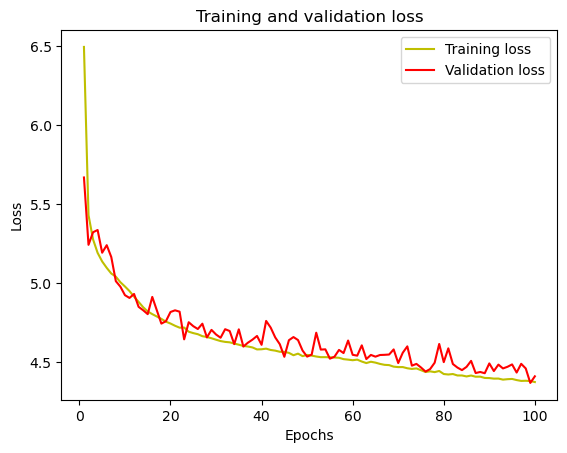

In [52]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import mean_absolute_error

In [55]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 300ms/step
Predicted values are:  [[0.3327657]
 [3.3327274]
 [3.384707 ]
 [2.99584  ]
 [3.2466328]]
Real values are:  10116     2.104838
25832     0.452122
97347     2.317413
126221    3.562709
139949    3.632002
Name: IC50, dtype: float64


In [59]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)


1522/1522 [==============================] - 5s 3ms/step - loss: 4.3696 - mae: 1.6347
Mean squared error from neural net:  4.369596481323242
Mean absolute error from neural net:  1.6346522569656372
